### Importing all the important libraries, classifiers, regressors and other tools

In [1]:
#importing numpy, pandas and matplot libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing ml regressor
from sklearn.ensemble import RandomForestRegressor

#importing ml classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

#importing oneHotEncoder and column transformer for converting text to numeric data and transforming the columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### Importing dataset for Regressor

In [2]:
#importing dataset, this dataset is about crop yield in india
ag_df = pd.read_csv("data/crop_yield.csv")
ag_df.head()

,Crop,State,Cost of Cultivation Per Hectare,Cost of Cultivation Per Hectare.1,Cost of Production Per Quintal,Yield
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


### Importing dataset for classifiers

In [3]:
#importing dataset, this dataset is about heart-disease
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Dividing feature data and target data for regressor

In [4]:
#Dividing feature data and target data
X = ag_df.drop("Yield ", axis=1)
y = ag_df["Yield "]

### Dividing feature data and target data for classifiers

In [5]:
#Dividing feature data and target data
Xh = heart_disease.drop("target", axis=1)
yh = heart_disease["target"]

### Converting text to number

In [6]:
#transforming our dataframe cells which have text values, converting them to numbers
categorical_features = ["Crop", "State"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)

### Creating training and test data for Regressor

In [7]:
#Creating train data and test data
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

### Creating training and test data for Classifiers

In [8]:
#Creating train data and test data
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, test_size=0.2)

### RandomForest Regressor Accuracy

In [9]:
#Creating Random forest Regressor model and getting accuracy
np.random.seed(1)

#fitting data into model
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)

#getting model score on test data
rfr_accuracy = rfr_model.score(X_test, y_test) 
rfr_accuracy 

0.9558985932581512

### Prediction time for RandomForest Regressor

In [21]:
#calculating time it takes to calculate the accuracy for given dataset 
res = %timeit -o rfr_model.predict(X_test)

5.94 ms ± 231 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Random Forest Classifier Accuracy

In [11]:
#Creating Random forest Classifier model and getting accuracy
np.random.seed(1)

#fitting data into model
rfc_model = RandomForestClassifier()
rfc_model.fit(Xh_train, yh_train)

#getting model score on test data
rfc_accuracy = rfc_model.score(Xh_test, yh_test) 
rfc_accuracy 

0.819672131147541

### Prediction time for RandomForest Classifier

In [12]:
#calculating time it takes to calculate the accuracy for given dataset 
%timeit rfc_model.predict(Xh_test)

8.49 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### KNeighbors Classifier Accuracy

In [13]:
#Creating Random forest Classifier model and getting accuracy
np.random.seed(1)

#fitting data into model
knc_model = KNeighborsClassifier()
knc_model.fit(Xh_train, yh_train)

#getting model score on test data
knc_accuracy = knc_model.score(Xh_test, yh_test) 
knc_accuracy 

0.7049180327868853

### Prediction time for KNeighbors Classifier

In [14]:
#calculating time it takes to calculate the accuracy for given dataset 
%timeit knc_model.predict(Xh_test)

3.1 ms ± 23.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### MLP (Neural Netword) Classifier Accuracy

In [26]:
#Creating Random forest Classifier model and getting accuracy
np.random.seed(0)

#fitting data into model
mlp_model = MLPClassifier()
mlp_model.fit(Xh_train, yh_train)

#getting model score on test data
mlp_accuracy = mlp_model.score(Xh_test, yh_test) 
mlp_accuracy 

0.819672131147541

#### Prediction time for MLP Classifier

In [16]:
#calculating time it takes to calculate the accuracy for given dataset 
%timeit mlp_model.predict(Xh_test)

1.28 ms ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
# Craeating two dictionary one to store the classifiers and the other to store the result
models = {"MLPClassifier": MLPClassifier(),
          "KNeighborsClassifier": KNeighborsClassifier(),
          "RandomForestClassifier": RandomForestClassifier()}
results = {}
models

{'MLPClassifier': MLPClassifier(),
 'KNeighborsClassifier': KNeighborsClassifier(),
 'RandomForestClassifier': RandomForestClassifier()}

In [25]:
np.random.seed(0)

for model_name, model in models.items():
    model.fit(Xh_train, yh_train)
    results[model_name] = model.score(Xh_test, yh_test)
results

{'MLPClassifier': 0.819672131147541,
 'KNeighborsClassifier': 0.7049180327868853,
 'RandomForestClassifier': 0.819672131147541}

In [19]:
df_results = pd.DataFrame(results.values(),
                          results.keys(),
                          columns=["Accuracy"])
df_results

,Accuracy
MLPClassifier,0.836066
KNeighborsClassifier,0.704918
RandomForestClassifier,0.836066


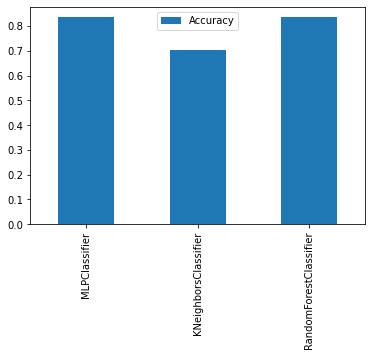

In [20]:
# Comparing the accuracy result
df_results.plot.bar();